What is Fashion_Mnist Project?
A Fashion MNIST machine learning project typically involves using the Fashion MNIST dataset to train machine learning models, particularly for 
image classification tasks. The goal is to develop algorithms that can accurately classify images of various clothing items into their respective 
categories, such as T-shirts, trousers, dresses, shoes, and more.

In [3]:
#Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.10.0


In [4]:
# Loading Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) =fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
print(train_images.shape)
print(test_images.shape)
# There are 60000 train images and 10000 test images available in the dataset.

(60000, 28, 28)
(10000, 28, 28)


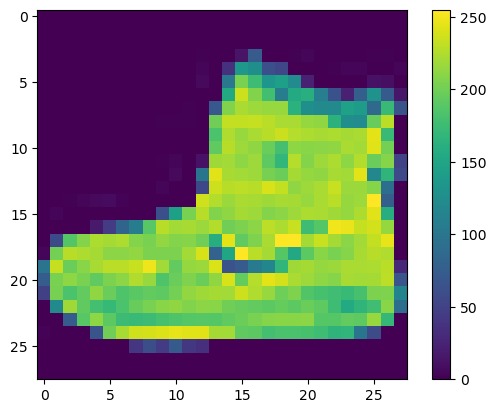

In [10]:
# Plotting image
plt.figure() # Create a new figure
plt.imshow(train_images[0]) # Display data as an image
plt.colorbar() # Add a colorbar to a plot.
plt.grid(False) # Configure the grid lines.
plt.show() # Display all open figures.

In [13]:
# Resize images
train_images = train_images/255.0
test_images = test_images/255.0
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

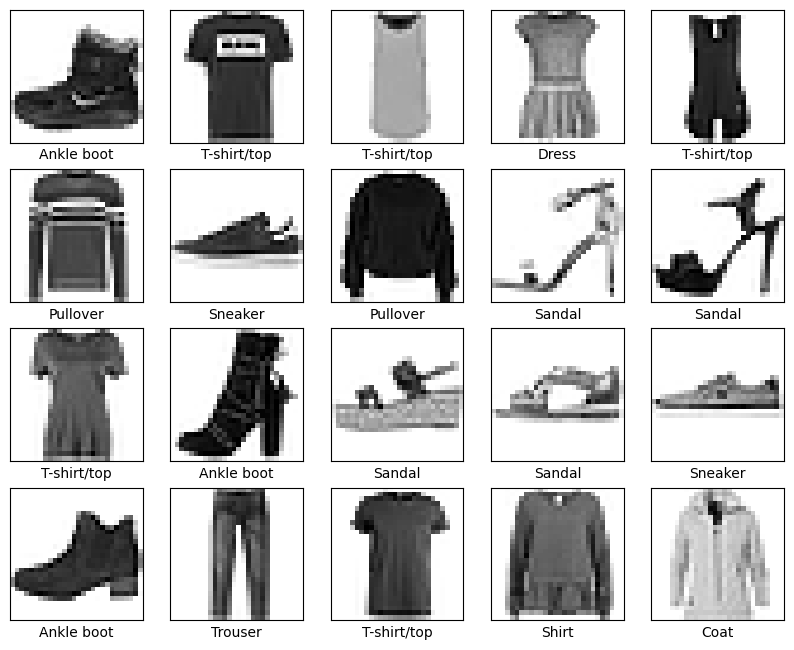

In [17]:
# Displaying train images according to class_names
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap= plt.cm.binary) # This expression is typically used to display an image represented by the train_images[i] array 
    plt.xlabel(class_names[train_labels[i]]) # This sets the label for the x-axis of the plot
plt.show()

In [19]:
# reshape the image arrays to a format suitable for input into a convolutional neural network (CNN)
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
test_images = test_images.reshape(test_images.shape[0],28,28,1).astype('float32')

In [21]:
# Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,activation='softmax'),
])

In [23]:
# Comple model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [24]:
# fit train images into the model
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


C:\Users\Amruta\.conda\envs\mytensor_env\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 45s 24ms/step - loss: 1.8061 - accuracy: 0.3159
Epoch 2/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.8883 - accuracy: 0.6581
Epoch 3/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.7593 - accuracy: 0.7138


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('\n test accuracy is:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.5845 - accuracy: 0.7781

 test accuracy is: 0.7781000137329102
